In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 设置随机种子以保持可重复性
np.random.seed(42)

# 数据预处理

In [2]:
# 读取数据
raw_dataset = pd.read_csv("bank-data.csv", index_col=0)

In [3]:
raw_dataset

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
id,,,,,,,,,,,
ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES


In [4]:
# 离散值统一成数字标签
raw_dataset["sex"] = raw_dataset["sex"].map({"FEMALE": 0, "MALE": 1})
raw_dataset["region"] = raw_dataset["region"].astype("category").cat.codes
raw_dataset["married"] = raw_dataset["married"].map({"NO": 0, "YES": 1})
raw_dataset["car"] = raw_dataset["car"].map({"NO": 0, "YES": 1})
raw_dataset["save_act"] = raw_dataset["save_act"].map({"NO": 0, "YES": 1})
raw_dataset["current_act"] = raw_dataset["current_act"].map({"NO": 0, "YES": 1})
raw_dataset["mortgage"] = raw_dataset["mortgage"].map({"NO": 0, "YES": 1})
raw_dataset["pep"] = raw_dataset["pep"].map({"NO": 0, "YES": 1})

In [5]:
raw_dataset

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
id,,,,,,,,,,,
ID12101,48,0,0,17546.00,0,1,0,0,0,0,1
ID12102,40,1,3,30085.10,1,3,1,0,1,1,0
ID12103,51,0,0,16575.40,1,0,1,1,1,0,0
ID12104,23,0,3,20375.40,1,3,0,0,1,0,0
ID12105,57,0,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
ID12696,61,0,0,47025.00,0,2,1,1,1,1,0
ID12697,30,0,0,9672.25,1,0,1,1,1,0,0
ID12698,31,0,3,15976.30,1,0,1,1,0,0,1


In [6]:
# 连续数据进行概念分层
def discretize_columns(data, columns):
    bin_ranges = {}  # 用于存储分箱范围

    for column in columns:
        # 计算分位数
        _, bins = pd.qcut(data[column], q=5, labels=False, duplicates='drop', retbins=True)

        # 存储分箱范围
        bin_ranges[column] = bins.tolist()

        # 替换原始数据中的列
        data[column] = pd.cut(data[column], bins=bins, labels=False, include_lowest=True)

    return data, bin_ranges

# 需要进行分箱的列
columns_to_discretize = ['age', 'income', 'children']
# 执行分箱替换
dataset, bin_ranges = discretize_columns(raw_dataset, columns_to_discretize)

# 打印分箱范围
print("Bin Ranges:")
for column, ranges in bin_ranges.items():
    print(f"{column}: {ranges}")

dataset.astype(int)

Bin Ranges:
age: [18.0, 27.0, 38.0, 47.0, 58.0, 67.0]
income: [5014.21, 15838.380000000001, 22162.3, 28479.98, 38448.02, 63130.1]
children: [0.0, 1.0, 2.0, 3.0]


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
id,,,,,,,,,,,
ID12101,3,0,0,1,0,0,0,0,0,0,1
ID12102,2,1,3,3,1,2,1,0,1,1,0
ID12103,3,0,0,1,1,0,1,1,1,0,0
ID12104,0,0,3,1,1,2,0,0,1,0,0
ID12105,3,0,1,4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
ID12696,4,0,0,4,0,1,1,1,1,1,0
ID12697,1,0,0,0,1,0,1,1,1,0,0
ID12698,1,0,3,1,1,0,1,1,0,0,1


# K-MEANS聚类

In [7]:
def k_means(dataset, k = 3):
    def assign_to_nearest_cluster(point, centers):
        # 计算点到每个聚类中心的距离，并返回最近聚类中心的索引
        distances = ((centers - point) ** 2).sum(axis=1) ** 0.5
        nearest_cluster = distances.idxmin()
        return nearest_cluster

    # 从数据集中采样 k 个初始中心
    centers_indices = np.random.choice(len(dataset), k, replace=False)
    centers = dataset.iloc[centers_indices]
    
    # 存储聚类结果
    cluster_group = pd.Series(index=dataset.index, dtype=object)
    
    #迭代更新数据中心直至中心位置不再变化也就是收敛
    while True:
        # 根据当前的中心进行暂时的聚类划分
        new_group = dataset.apply(lambda point: assign_to_nearest_cluster(point, centers), axis=1)

        if new_group.equals(cluster_group):
            break
        else:
            cluster_group = new_group

        # 计算聚类中心的新位置
        centers = dataset.groupby(cluster_group).mean()

    return cluster_group

In [8]:
k_means_result = k_means(dataset, k=3)

In [9]:
# 使用 pd.factorize 将聚类结果转化为唯一的整数标签
labels, unique_labels = pd.factorize(k_means_result)

# 将原始数据集和转化后的标签合并
result_df = pd.concat([dataset, pd.Series(labels, index=dataset.index, name='cluster')], axis=1)

In [10]:
cluster_0 = result_df[result_df["cluster"] == 0]
cluster_1 = result_df[result_df["cluster"] == 1]
cluster_2 = result_df[result_df["cluster"] == 2]
cluster_result = []
cluster_result.append(cluster_0)
cluster_result.append(cluster_1)
cluster_result.append(cluster_2)

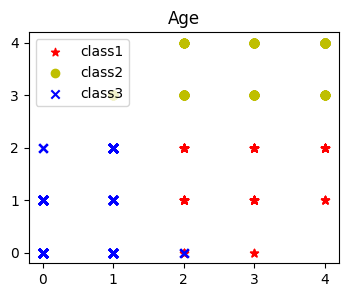

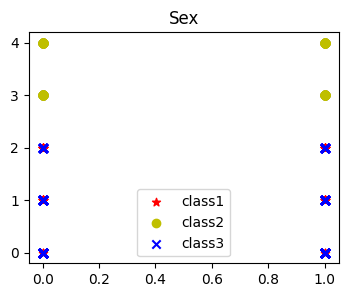

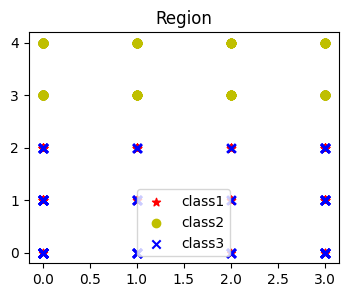

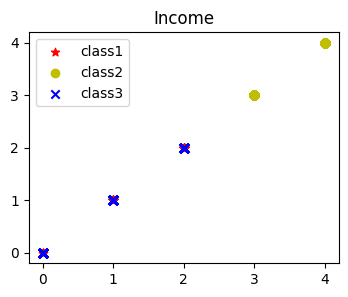

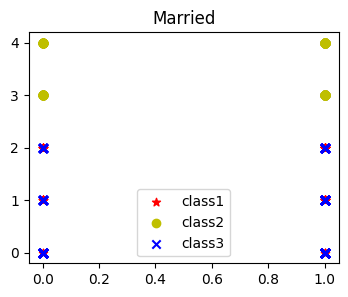

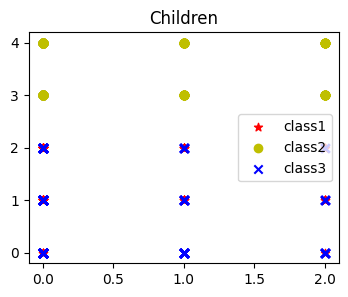

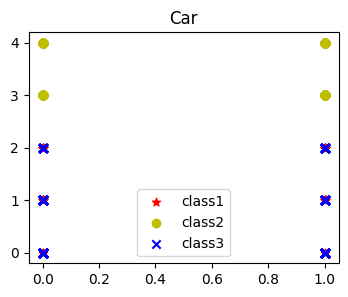

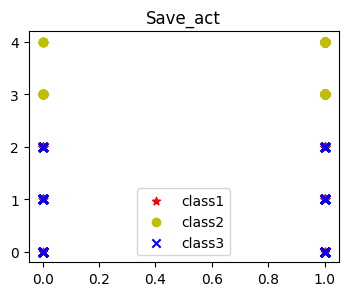

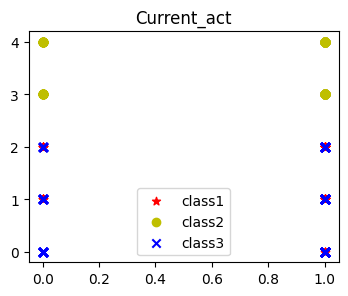

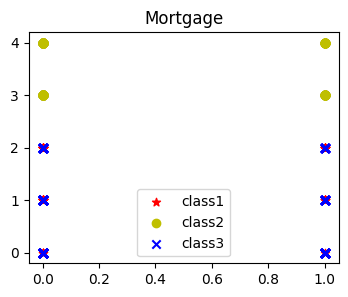

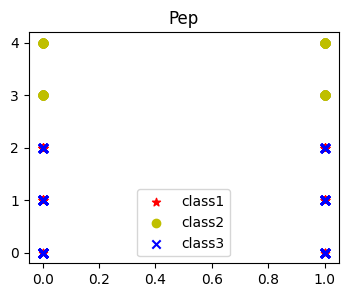

In [11]:
colors = ['r', 'y', 'b']  # 设置颜色
markers = ['*', 'o', 'x'] # 设置点的形状

for column in dataset.columns:
    plt.figure(figsize=(4,3))
    for i in range(3):
        plt.scatter(cluster_result[i][column], cluster_result[i]["income"], c=colors[i], marker=markers[i])
    plt.legend(['class1', 'class2', 'class3'])
    plt.title(column.capitalize())
    plt.show()

# DBSCAN聚类

In [12]:
def dbscan(dataset, eps=5.0, min_samples=15):
    # 将所有点标记为未访问。
    visited_points = pd.Series(False, index=dataset.index)

    # 存储聚类结果。
    cluster_assignments = pd.Series(0, index=dataset.index, dtype=int)

    # 记录当前聚类的编号。
    cluster_id = 0

    # 计算每个点的邻域。
    neighborhoods = dataset.apply(lambda point: (dataset - point).pow(2).sum(axis=1).pow(0.5) <= eps, axis=1)

    # 从第一个点开始，依次访问每个点。
    for point_id in dataset.index:
        # 如果该点已经被访问过，则跳过。
        if visited_points[point_id]:
            continue

        # 将该点标记为已访问。
        visited_points[point_id] = True

        # 计算该点的邻域。
        neighborhood = neighborhoods[point_id]

        # 如果该点的邻域中的点的数量小于 min_samples，将该点标记为噪声。
        if neighborhood.sum() < min_samples:
            cluster_assignments[point_id] = -1
            continue

        # 否则，将该点加入一个新的聚类。
        cluster_id += 1
        cluster_assignments[point_id] = cluster_id

        # 依次访问该点的邻域中的点。
        for neighbor_id in neighborhood[neighborhood].index:
            # 如果该点已经被访问过，则跳过。
            if visited_points[neighbor_id]:
                continue

            # 将该点标记为已访问。
            visited_points[neighbor_id] = True

            # 计算该点的邻域。
            neighbor_neighborhood = neighborhoods[neighbor_id]

            # 如果该点的邻域中的点的数量大于等于 min_samples，将该点加入当前聚类。
            if neighbor_neighborhood.sum() >= min_samples:
                cluster_assignments[neighbor_id] = cluster_id

            # 否则，将该点标记为噪声。
            else:
                cluster_assignments[neighbor_id] = -1

    return cluster_assignments

In [13]:
dbscan_result = dbscan(dataset, eps=4, min_samples=10)

In [14]:
cluster_sizes = dbscan_result.value_counts()
print(cluster_sizes)

1    417
2    146
3     33
4      2
5      2
dtype: int64


In [15]:
# 获取有效的聚类编号列表（不包括噪声）
valid_clusters = dbscan_result[dbscan_result != -1].unique()

# 输出有效聚类的数量
num_clusters = len(valid_clusters)
print(f"Number of clusters: {num_clusters}")

Number of clusters: 5


In [16]:
# 使用 pd.factorize 将聚类结果转化为唯一的整数标签
labels, unique_labels = pd.factorize(dbscan_result)

# 将原始数据集和转化后的标签合并
result_df = pd.concat([dataset, pd.Series(labels, index=dataset.index, name='cluster')], axis=1)

In [17]:
cluster_0 = result_df[result_df["cluster"] == 0]
cluster_1 = result_df[result_df["cluster"] == 1]

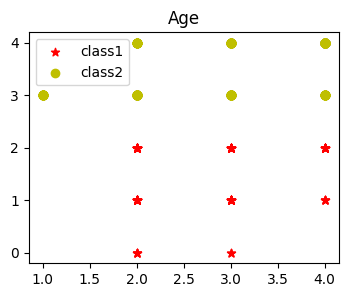

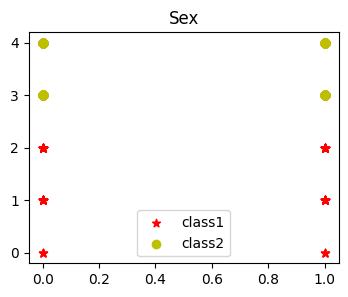

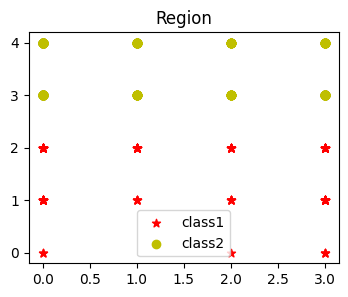

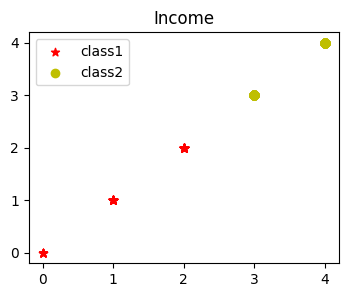

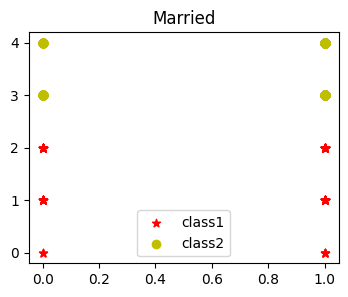

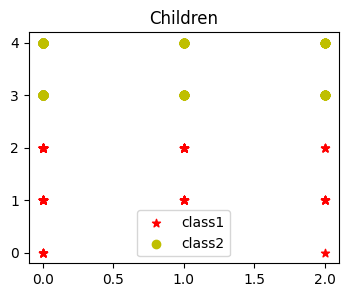

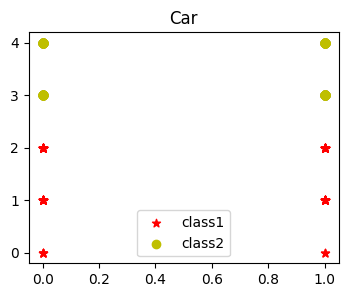

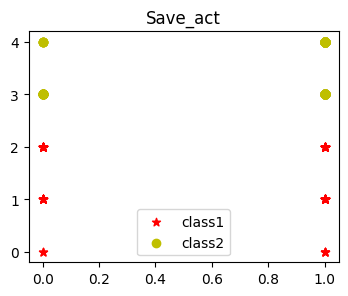

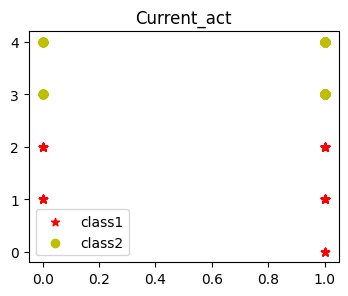

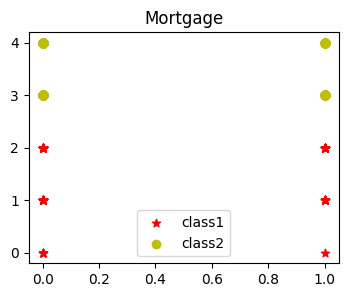

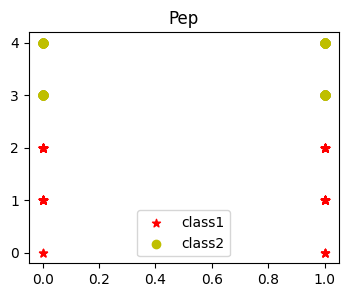

In [18]:
colors = ['r', 'y']  # 设置颜色
markers = ['*', 'o'] # 设置点的形状

for column in dataset.columns:
    plt.figure(figsize=(4,3))
    for i in range(2):
        plt.scatter(cluster_result[i][column], cluster_result[i]["income"], c=colors[i], marker=markers[i])
    plt.legend(['class1', 'class2'])
    plt.title(column.capitalize())
    plt.show()